## Optimization per Stadsdeel
The aim of this Notebook is to explore the possibiliy to optimize certain subsets of the problem and to reassamble these results to see whether or not this actually helps in obtaining a valid, improved solution. 

### Current situation
The process starts with the normal loading of the data, followed by a calculation of the average distance and penalties as a way to set a baseline. 

In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber
from Code.loading_data import create_all_households

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection (optional parameter)?
API data loaded
DB relation POIs loaded
Table all households created
API and DB joined
containers per cluster determined


..\Code\loading_data.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3]).astype('int64')


distance matrix loaded


In [3]:
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.2455230515281
Penalties are: 295.1202834747615


### Modification
This step consists of remvoving all information regarding the configuration of the containers in a certain stadsdeel, optimizing a copy of this and resetting it back into the initial solution to see its impact. The first optimization is done in stadsdeel Zuidoost (T), as it contains the least amount of garbage clusters

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']

In [ ]:
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined_new = joined[joined['stadsdeel'] != 'T']
joined_new = joined_new.append(best_solution, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined_new, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Conclusion
This system of isolating certain stadsdelen appears to be working just fine and can be applied further to be used for multiple (clusters of) stadsdelen. The obvious places for optimization include Zuidoost (T), Noord (N), Nieuw-West(F) and the remaining cluster of Oost (M), Zuidoost(T), West(E) and Centrum(A). This is applied next

### Optimization of Zuid-Oost (T)

In [11]:
joined_T = joined[joined['stadsdeel'] == 'T']
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 249.6004611676881
Penalties are: 308.1859662117452
Average distance is : 248.58986072868302
Penalties are: 324.03315277834906
Average distance is : 248.24613560639435
Penalties are: 317.60948062685094
Average distance is : 259.65708733140605
Penalties are: 331.5412084687204
Average distance is : 253.78210525821714
Penalties are: 320.5298966886055
Average distance is : 251.0088087455015
Penalties are: 313.72705879328777
Average distance is : 257.87581836872755
Penalties are: 328.0021980957473
Average distance is : 257.52693890510665
Penalties are: 320.0460892563343
Average distance is : 251.728195645587
Penalties are: 322.6625204408982
Average di

Average distance is : 249.46911919720245
Penalties are: 310.77831947890814
310.77831947890814 308.1859662117452
21
Amount of clusters to change: 20
Average distance is : 250.41277788800892
Penalties are: 309.3911941332121
309.3911941332121 308.1859662117452
19
Amount of clusters to change: 14
Average distance is : 249.86113750682378
Penalties are: 306.94674800479675
306.94674800479675 308.1859662117452
19
Amount of clusters to change: 20
Average distance is : 248.08075405481563
Penalties are: 307.2517906572964
307.2517906572964 306.94674800479675
4
Amount of clusters to change: 9
Average distance is : 249.37246039522864
Penalties are: 308.6340980566466
308.6340980566466 306.94674800479675
14
Amount of clusters to change: 16
Average distance is : 252.26779624161802
Penalties are: 309.0916342290202
309.0916342290202 306.94674800479675
10
Amount of clusters to change: 10
Average distance is : 249.96387500194479
Penalties are: 307.58511625454844
307.58511625454844 306.94674800479675
12
Amo

Average distance is : 249.8524834686847
Penalties are: 292.59128270390875
292.59128270390875 292.26211032146097
13
Amount of clusters to change: 14
Average distance is : 251.4223993275882
Penalties are: 295.20574770680105
295.20574770680105 292.26211032146097
9
Amount of clusters to change: 11
Average distance is : 250.26365155755326
Penalties are: 292.9790482604743
292.9790482604743 292.26211032146097
8
Amount of clusters to change: 7
Average distance is : 250.0480569360151
Penalties are: 292.90369264936777
292.90369264936777 292.26211032146097
17
Amount of clusters to change: 17
Average distance is : 250.7829483345772
Penalties are: 293.38152911043454
293.38152911043454 292.26211032146097
20
Amount of clusters to change: 20
Average distance is : 249.92114104834468
Penalties are: 294.34633184597584
294.34633184597584 292.26211032146097
10
Amount of clusters to change: 15
Average distance is : 251.7261095980185
Penalties are: 296.86774405447665
296.86774405447665 292.26211032146097
12


Average distance is : 249.24063500366563
Penalties are: 288.0417938770451
288.0417938770451 285.892352937531
10
Amount of clusters to change: 12
Average distance is : 249.46490454106183
Penalties are: 283.7322443301524
283.7322443301524 285.892352937531
20
Amount of clusters to change: 11
Average distance is : 246.4803386983215
Penalties are: 285.3760168133185
285.3760168133185 283.7322443301524
11
Amount of clusters to change: 12
Average distance is : 249.7101771274863
Penalties are: 283.18617755194776
283.18617755194776 283.7322443301524
9
Amount of clusters to change: 11
Average distance is : 250.42222977080635
Penalties are: 292.03726878588833
292.03726878588833 283.18617755194776
13
Amount of clusters to change: 12
Average distance is : 249.1525670715021
Penalties are: 284.46824939072246
284.46824939072246 283.18617755194776
17
Amount of clusters to change: 10
Average distance is : 250.97285796830636
Penalties are: 283.3465916883546
283.3465916883546 283.18617755194776
13
Amount o

Average distance is : 249.20656443576604
Penalties are: 268.7164025982073
268.7164025982073 266.98087752488743
6
Amount of clusters to change: 9
Average distance is : 250.10248602168602
Penalties are: 270.94815039239984
270.94815039239984 266.98087752488743
11
Amount of clusters to change: 12
Average distance is : 249.3643254065846
Penalties are: 270.4151851171052
270.4151851171052 266.98087752488743
10
Amount of clusters to change: 10
Average distance is : 248.19633449624916
Penalties are: 268.13408790119377
268.13408790119377 266.98087752488743
9
Amount of clusters to change: 10
Average distance is : 248.63854788560286
Penalties are: 275.05307418452554
275.05307418452554 266.98087752488743
9
Amount of clusters to change: 7
Average distance is : 250.2450384031091
Penalties are: 268.9560049981411
268.9560049981411 266.98087752488743
17
Amount of clusters to change: 14
Average distance is : 250.57194084415715
Penalties are: 271.8008584410756
271.8008584410756 266.98087752488743
16
Amoun

Average distance is : 248.50959988538733
Penalties are: 271.3711002065262
271.3711002065262 263.93149888475835
18
Amount of clusters to change: 15
Average distance is : 250.49911025902398
Penalties are: 266.32661990912845
266.32661990912845 263.93149888475835
15
Amount of clusters to change: 12
Average distance is : 251.33658425129474
Penalties are: 265.36483378769105
265.36483378769105 263.93149888475835
22
Amount of clusters to change: 15
Average distance is : 248.78734276999396
Penalties are: 269.7332313824295
269.7332313824295 263.93149888475835
6
Amount of clusters to change: 11
Average distance is : 250.4082580690445
Penalties are: 265.6412714374226
265.6412714374226 263.93149888475835
10
Amount of clusters to change: 8
Average distance is : 250.12305341342335
Penalties are: 265.3756379182156
265.3756379182156 263.93149888475835
10
Amount of clusters to change: 10
Average distance is : 250.18250232587994
Penalties are: 264.7650925030979
264.7650925030979 263.93149888475835
8
Amou

Average distance is : 251.9379912890066
Penalties are: 258.0707591078067
258.0707591078067 258.64508069646394
15
Amount of clusters to change: 8
Average distance is : 253.16239190013852
Penalties are: 261.8930186080132
261.8930186080132 258.0707591078067
13
Amount of clusters to change: 15
Average distance is : 252.0250914537375
Penalties are: 268.1385670177612
268.1385670177612 258.0707591078067
14
Amount of clusters to change: 10
Average distance is : 252.26656321082314
Penalties are: 261.70800210656756
261.70800210656756 258.0707591078067
12
Amount of clusters to change: 9
Average distance is : 254.09838422074668
Penalties are: 259.2620217265593
259.2620217265593 258.0707591078067
13
Amount of clusters to change: 12
Average distance is : 250.9288700911078
Penalties are: 261.27418459314333
261.27418459314333 258.0707591078067
13
Amount of clusters to change: 11
Average distance is : 252.2127255044246
Penalties are: 266.24242982238746
266.24242982238746 258.0707591078067
18
Amount of 

Average distance is : 253.999362922834
Penalties are: 260.9853520033044
260.9853520033044 253.2065560305659
5
Amount of clusters to change: 10
Average distance is : 251.45069394593358
Penalties are: 259.0649463031805
259.0649463031805 253.2065560305659
10
Amount of clusters to change: 12
Average distance is : 252.58144157228966
Penalties are: 253.58756189591077
253.58756189591077 253.2065560305659
20
Amount of clusters to change: 20
Average distance is : 250.42445560089192
Penalties are: 258.65576955803385
258.65576955803385 253.2065560305659
17
Amount of clusters to change: 17
Average distance is : 253.17895121467086
Penalties are: 254.1154546055349
254.1154546055349 253.2065560305659
10
Amount of clusters to change: 14
Average distance is : 253.42206411139475
Penalties are: 253.66574958694756
253.66574958694756 253.2065560305659
17
Amount of clusters to change: 14
Average distance is : 251.35761767553157
Penalties are: 259.0283374638579
259.0283374638579 253.2065560305659
14
Amount o

Average distance is : 253.31657135759065
Penalties are: 254.45757118959108
254.45757118959108 248.98331140024783
22
Amount of clusters to change: 16
Average distance is : 251.78926953873182
Penalties are: 258.48339370095
258.48339370095 248.98331140024783
15
Amount of clusters to change: 11
Average distance is : 250.96533286363774
Penalties are: 252.32041933085506
252.32041933085506 248.98331140024783
9
Amount of clusters to change: 12
Average distance is : 250.7196776984064
Penalties are: 255.41006515902518
255.41006515902518 248.98331140024783
16
Amount of clusters to change: 13
Average distance is : 253.11577435119253
Penalties are: 253.57122271788518
253.57122271788518 248.98331140024783
19
Amount of clusters to change: 10
Average distance is : 252.27923182453287
Penalties are: 253.69495588599747
253.69495588599747 248.98331140024783
11
Amount of clusters to change: 11
Average distance is : 252.607343362107
Penalties are: 253.89645152829408
253.89645152829408 248.98331140024783
11


Average distance is : 249.99025517028545
Penalties are: 253.23936050098717
253.23936050098717 245.02887480380008
24
Amount of clusters to change: 15
Average distance is : 248.97965155593587
Penalties are: 244.8731001032631
244.8731001032631 245.02887480380008
13
Amount of clusters to change: 12
Average distance is : 249.84408856971257
Penalties are: 245.73799320528707
245.73799320528707 244.8731001032631
12
Amount of clusters to change: 14
Average distance is : 249.61434063653405
Penalties are: 255.33695817843866
255.33695817843866 244.8731001032631
13
Amount of clusters to change: 13
Average distance is : 248.6663774915515
Penalties are: 248.80474871953737
248.80474871953737 244.8731001032631
11
Amount of clusters to change: 10
Average distance is : 248.46888710626448
Penalties are: 248.25351191656338
248.25351191656338 244.8731001032631
13
Amount of clusters to change: 10
Average distance is : 249.875934331406
Penalties are: 248.74962346137957
248.74962346137957 244.8731001032631
5
A

Average distance is : 248.20967658402276
Penalties are: 243.5278173275506
243.5278173275506 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 254.79943389478169
Penalties are: 245.03177399636542
245.03177399636542 243.02761420900453
18
Amount of clusters to change: 12
Average distance is : 254.31872965900172
Penalties are: 246.4047883725733
246.4047883725733 243.02761420900453
17
Amount of clusters to change: 13
Average distance is : 249.83931394286475
Penalties are: 249.49907752994628
249.49907752994628 243.02761420900453
12
Amount of clusters to change: 13
Average distance is : 249.7406186140392
Penalties are: 243.64822476249483
243.64822476249483 243.02761420900453
14
Amount of clusters to change: 14
Average distance is : 248.84411240199094
Penalties are: 245.57800881866999
245.57800881866999 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 248.74998702369143
Penalties are: 252.2226475629905
252.2226475629905 243.02761420900453


Average distance is : 248.67733540633932
Penalties are: 241.97386212308965
241.97386212308965 242.19352947129286
17
Amount of clusters to change: 16
Average distance is : 253.50603253310604
Penalties are: 245.82199458901277
245.82199458901277 241.97386212308965
11
Amount of clusters to change: 8
Average distance is : 248.9588850003072
Penalties are: 243.70289708798018
243.70289708798018 241.97386212308965
13
Amount of clusters to change: 13
Average distance is : 248.15570027571462
Penalties are: 246.37543684427925
246.37543684427925 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 246.8868261690137
Penalties are: 246.8916854812061
246.8916854812061 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 251.65982485719428
Penalties are: 245.37223946803235
245.37223946803235 241.97386212308965
9
Amount of clusters to change: 11
Average distance is : 247.43764208928377
Penalties are: 248.8950092936803
248.8950092936803 241.97386212308965
1

Average distance is : 248.80447808086535
Penalties are: 240.65921650144568
240.65921650144568 239.30616732755058
16
Amount of clusters to change: 15
Average distance is : 247.7692641723551
Penalties are: 246.1129566088393
246.1129566088393 239.30616732755058
16
Amount of clusters to change: 14
Average distance is : 257.292948355713
Penalties are: 243.36968042131352
243.36968042131352 239.30616732755058
8
Amount of clusters to change: 7
Average distance is : 248.2668223842092
Penalties are: 242.14931592317228
242.14931592317228 239.30616732755058
6
Amount of clusters to change: 6
Average distance is : 249.14803585339382
Penalties are: 239.30616732755058
239.30616732755058 239.30616732755058
14
Amount of clusters to change: 12
Average distance is : 249.298747133334
Penalties are: 239.9277560305659
239.9277560305659 239.30616732755058
19
Amount of clusters to change: 15
Average distance is : 248.07684871746585
Penalties are: 246.90253733994217
246.90253733994217 239.30616732755058
15
Amou

Average distance is : 251.09996912880547
Penalties are: 244.31396425030977
244.31396425030977 236.5562936802974
16
Amount of clusters to change: 15
Average distance is : 249.12536257324825
Penalties are: 240.69268302354396
240.69268302354396 236.5562936802974
14
Amount of clusters to change: 9
Average distance is : 249.1939139787592
Penalties are: 238.35588804213137
238.35588804213137 236.5562936802974
5
Amount of clusters to change: 6
Average distance is : 250.83694131621297
Penalties are: 237.03928306484923
237.03928306484923 236.5562936802974
16
Amount of clusters to change: 12
Average distance is : 249.17060741582776
Penalties are: 238.9748907063197
238.9748907063197 236.5562936802974
17
Amount of clusters to change: 14
Average distance is : 249.37663891530053
Penalties are: 238.96926299049977
238.96926299049977 236.5562936802974
19
Amount of clusters to change: 13
Average distance is : 250.56825013909298
Penalties are: 239.7766430813713
239.7766430813713 236.5562936802974
20
Amoun

Average distance is : 250.95956442850354
Penalties are: 236.98699244114002
236.98699244114002 236.4954705700124
15
Amount of clusters to change: 11
Average distance is : 250.17285550274448
Penalties are: 240.77317333746387
240.77317333746387 236.4954705700124
19
Amount of clusters to change: 11
Average distance is : 249.72224339517246
Penalties are: 242.15149624122262
242.15149624122262 236.4954705700124
14
Amount of clusters to change: 18
Average distance is : 249.95464659034243
Penalties are: 236.59672513629602
236.59672513629602 236.4954705700124
20
Amount of clusters to change: 16
Average distance is : 247.99927002289516
Penalties are: 242.29799446509705
242.29799446509705 236.4954705700124
15
Amount of clusters to change: 13
Average distance is : 252.97320915577234
Penalties are: 243.52030258157782
243.52030258157782 236.4954705700124
21
Amount of clusters to change: 17
Average distance is : 249.6807653868905
Penalties are: 238.8810329409335
238.8810329409335 236.4954705700124
11


Average distance is : 250.94393524243822
Penalties are: 239.08316071871124
239.08316071871124 233.58625371747212
22
Amount of clusters to change: 19
Average distance is : 250.54812462591184
Penalties are: 249.54746106980585
249.54746106980585 233.58625371747212
16
Amount of clusters to change: 12
Average distance is : 252.07305131547355
Penalties are: 236.98073331268068
236.98073331268068 233.58625371747212
5
Amount of clusters to change: 8
Average distance is : 251.24829468907373
Penalties are: 234.53084111937218
234.53084111937218 233.58625371747212
17
Amount of clusters to change: 15
Average distance is : 252.31186667420891
Penalties are: 235.16932548533666
235.16932548533666 233.58625371747212
9
Amount of clusters to change: 13
Average distance is : 251.24936452445792
Penalties are: 242.00455351094584
242.00455351094584 233.58625371747212
23
Amount of clusters to change: 20
Average distance is : 248.3067700857326
Penalties are: 244.79317251135896
244.79317251135896 233.586253717472

Average distance is : 256.5446875353265
Penalties are: 239.96944237680202
239.96944237680202 231.7319876290789
14
Amount of clusters to change: 11
Average distance is : 253.69197771472977
Penalties are: 237.10849265794667
237.10849265794667 231.7319876290789
20
Amount of clusters to change: 15
Average distance is : 253.7554667002975
Penalties are: 237.44281400247831
237.44281400247831 231.7319876290789
14
Amount of clusters to change: 13
Average distance is : 250.8457462865047
Penalties are: 238.4882757331681
238.4882757331681 231.7319876290789
4
Amount of clusters to change: 12
Average distance is : 253.74167707184287
Penalties are: 236.08355782734407
236.08355782734407 231.7319876290789
17
Amount of clusters to change: 15
Average distance is : 254.96026801233063
Penalties are: 242.68819607600165
242.68819607600165 231.7319876290789
11
Amount of clusters to change: 17
Average distance is : 254.33496807448194
Penalties are: 232.5069305245766
232.5069305245766 231.7319876290789
12
Amoun

Average distance is : 254.11614496752486
Penalties are: 236.8151158612144
236.8151158612144 230.16960877736472
7
Amount of clusters to change: 10
Average distance is : 254.1540487334328
Penalties are: 236.81219097480383
236.81219097480383 230.16960877736472
2
Amount of clusters to change: 4
Average distance is : 254.2624608472983
Penalties are: 230.99160772408095
230.99160772408095 230.16960877736472
20
Amount of clusters to change: 10
Average distance is : 255.65100025096277
Penalties are: 232.82253849648907
232.82253849648907 230.16960877736472
16
Amount of clusters to change: 9
Average distance is : 254.6695147913849
Penalties are: 231.37759266831887
231.37759266831887 230.16960877736472
10
Amount of clusters to change: 15
Average distance is : 253.6691814594099
Penalties are: 235.09068736059479
235.09068736059479 230.16960877736472
18
Amount of clusters to change: 16
Average distance is : 254.23785167547334
Penalties are: 230.32913698884755
230.32913698884755 230.16960877736472
11


Average distance is : 252.99894271904012
Penalties are: 241.1399876604146
241.1399876604146 230.16960877736472
12
Amount of clusters to change: 12
Average distance is : 254.90543573750054
Penalties are: 230.88123048327137
230.88123048327137 230.16960877736472
16
Amount of clusters to change: 16
Average distance is : 254.22647139050952
Penalties are: 236.08501540685668
236.08501540685668 230.16960877736472
10
Amount of clusters to change: 11
Average distance is : 252.25134661060986
Penalties are: 233.46566658405618
233.46566658405618 230.16960877736472
15
Amount of clusters to change: 12
Average distance is : 255.08920888374652
Penalties are: 235.96556615035104
235.96556615035104 230.16960877736472
4
Amount of clusters to change: 6
Average distance is : 254.35175321762625
Penalties are: 232.3571054935977
232.3571054935977 230.16960877736472
12
Amount of clusters to change: 10
Average distance is : 253.80363658012732
Penalties are: 235.82617600165221
235.82617600165221 230.16960877736472

Average distance is : 253.84927837916757
Penalties are: 234.16107490706324
234.16107490706324 230.16960877736472
6
Amount of clusters to change: 7
Average distance is : 254.9491310754418
Penalties are: 232.80768163981827
232.80768163981827 230.16960877736472
9
Amount of clusters to change: 11
Average distance is : 255.64327768305645
Penalties are: 235.34017649731518
235.34017649731518 230.16960877736472
16
Amount of clusters to change: 8
Average distance is : 253.22726672790128
Penalties are: 232.41314911193723
232.41314911193723 230.16960877736472
10
Amount of clusters to change: 16
Average distance is : 255.65103952808866
Penalties are: 234.7866704047914
234.7866704047914 230.16960877736472
17
Amount of clusters to change: 14
Average distance is : 253.91572140916142
Penalties are: 234.8092723048327
234.8092723048327 230.16960877736472
14
Amount of clusters to change: 11
Average distance is : 253.95198882807702
Penalties are: 235.9991588393226
235.9991588393226 230.16960877736472
10
A

Average distance is : 256.08027607638275
Penalties are: 229.14309233787694
229.14309233787694 229.40115741429165
17
Amount of clusters to change: 9
Average distance is : 255.66641195358142
Penalties are: 236.90269297810823
236.90269297810823 229.14309233787694
14
Amount of clusters to change: 12
Average distance is : 256.48080992436667
Penalties are: 245.87857668318873
245.87857668318873 229.14309233787694
15
Amount of clusters to change: 12
Average distance is : 255.96510461578202
Penalties are: 239.48799458945976
239.48799458945976 229.14309233787694
9
Amount of clusters to change: 12
Average distance is : 256.81003213800074
Penalties are: 236.80627675436784
236.80627675436784 229.14309233787694
7
Amount of clusters to change: 6
Average distance is : 256.4075844749933
Penalties are: 231.86005861214375
231.86005861214375 229.14309233787694
7
Amount of clusters to change: 8
Average distance is : 257.23316745765
Penalties are: 233.09355390342222
233.09355390342222 229.14309233787694
12


Average distance is : 252.9982562584873
Penalties are: 233.76053684427922
233.76053684427922 227.2100494630318
13
Amount of clusters to change: 12
Average distance is : 255.71714906108934
Penalties are: 229.6595076621231
229.6595076621231 227.2100494630318
9
Amount of clusters to change: 12
Average distance is : 253.0392310374021
Penalties are: 232.76794072697234
232.76794072697234 227.2100494630318
5
Amount of clusters to change: 7
Average distance is : 254.26400827420827
Penalties are: 228.29828448988025
228.29828448988025 227.2100494630318
9
Amount of clusters to change: 12
Average distance is : 254.52011689017885
Penalties are: 233.0862147695358
233.0862147695358 227.2100494630318
21
Amount of clusters to change: 14
Average distance is : 254.47174845313668
Penalties are: 241.05208597686905
241.05208597686905 227.2100494630318
10
Amount of clusters to change: 14
Average distance is : 254.50477185173136
Penalties are: 234.92813343659645
234.92813343659645 227.2100494630318
6
Amount o

Average distance is : 254.89777951673992
Penalties are: 229.25270338703012
229.25270338703012 225.1926903139199
14
Amount of clusters to change: 12
Average distance is : 256.6181669282413
Penalties are: 235.06410245969067
235.06410245969067 225.1926903139199
3
Amount of clusters to change: 5
Average distance is : 256.1208486809391
Penalties are: 226.88133562577445
226.88133562577445 225.1926903139199
8
Amount of clusters to change: 11
Average distance is : 253.81457616607113
Penalties are: 230.67864706732757
230.67864706732757 225.1926903139199
17
Amount of clusters to change: 22
Average distance is : 252.67273218189794
Penalties are: 245.88615243700949
245.88615243700949 225.1926903139199
10
Amount of clusters to change: 11
Average distance is : 257.24862839232685
Penalties are: 228.49951581990916
228.49951581990916 225.1926903139199
10
Amount of clusters to change: 10
Average distance is : 254.9489431769123
Penalties are: 232.5279450433705
232.5279450433705 225.1926903139199
5
Amount

Average distance is : 255.89128379892304
Penalties are: 231.66993579099545
231.66993579099545 223.98575514250305
13
Amount of clusters to change: 13
Average distance is : 253.7062115101985
Penalties are: 231.52455464684016
231.52455464684016 223.98575514250305
12
Amount of clusters to change: 15
Average distance is : 257.3976354745168
Penalties are: 228.35233049727407
228.35233049727407 223.98575514250305
17
Amount of clusters to change: 16
Average distance is : 256.6756294432817
Penalties are: 227.36023137133418
227.36023137133418 223.98575514250305
8
Amount of clusters to change: 9
Average distance is : 256.6083851712563
Penalties are: 225.2077349442379
225.2077349442379 223.98575514250305
11
Amount of clusters to change: 14
Average distance is : 255.42870497151029
Penalties are: 228.93406272201568
228.93406272201568 223.98575514250305
7
Amount of clusters to change: 11
Average distance is : 256.0105011473935
Penalties are: 225.6706404378356
225.6706404378356 223.98575514250305
6
Amo

Average distance is : 256.3370456800133
Penalties are: 232.58765809582815
232.58765809582815 219.42773199091283
15
Amount of clusters to change: 15
Average distance is : 255.0598991648788
Penalties are: 226.94970074349442
226.94970074349442 219.42773199091283
14
Amount of clusters to change: 10
Average distance is : 253.75693536008725
Penalties are: 219.44047178851713
219.44047178851713 219.42773199091283
18
Amount of clusters to change: 16
Average distance is : 251.76713187305938
Penalties are: 226.37918471705905
226.37918471705905 219.42773199091283
13
Amount of clusters to change: 18
Average distance is : 254.15404446745117
Penalties are: 225.02421621010203
225.02421621010203 219.42773199091283
8
Amount of clusters to change: 11
Average distance is : 254.54384285579314
Penalties are: 221.37321561338288
221.37321561338288 219.42773199091283
10
Amount of clusters to change: 14
Average distance is : 253.3859805054046
Penalties are: 223.9903896117307
223.9903896117307 219.42773199091283

Average distance is : 254.4873324174233
Penalties are: 223.16270454357704
223.16270454357704 218.43208820735236
10
Amount of clusters to change: 16
Average distance is : 254.74340088959366
Penalties are: 224.366474370095
224.366474370095 218.43208820735236
9
Amount of clusters to change: 10
Average distance is : 254.22728380276155
Penalties are: 223.35597383312682
223.35597383312682 218.43208820735236
5
Amount of clusters to change: 8
Average distance is : 253.96824191115422
Penalties are: 219.32608870301527
219.32608870301527 218.43208820735236
21
Amount of clusters to change: 14
Average distance is : 256.18448159386156
Penalties are: 222.24554582817018
222.24554582817018 218.43208820735236
13
Amount of clusters to change: 12
Average distance is : 253.2331207056436
Penalties are: 227.35876340901612
227.35876340901612 218.43208820735236
14
Amount of clusters to change: 9
Average distance is : 254.58399513086073
Penalties are: 219.22116499380417
219.22116499380417 218.43208820735236
12


Average distance is : 252.66678300624432
Penalties are: 222.2356846757538
222.2356846757538 218.36783847583644
14
Amount of clusters to change: 9
Average distance is : 253.33299523641648
Penalties are: 222.43461707971915
222.43461707971915 218.36783847583644
12
Amount of clusters to change: 11
Average distance is : 252.91300296327537
Penalties are: 219.54988040066087
219.54988040066087 218.36783847583644
11
Amount of clusters to change: 11
Average distance is : 251.6437484828569
Penalties are: 222.68528143329203
222.68528143329203 218.36783847583644
17
Amount of clusters to change: 18
Average distance is : 252.93960344759853
Penalties are: 229.05686866997107
229.05686866997107 218.36783847583644
8
Amount of clusters to change: 14
Average distance is : 252.93650729117036
Penalties are: 220.26451497315156
220.26451497315156 218.36783847583644
15
Amount of clusters to change: 10
Average distance is : 252.94761870730918
Penalties are: 225.91367238744317
225.91367238744317 218.3678384758364

Average distance is : 253.73713366256158
Penalties are: 221.01295933834464
221.01295933834464 218.32087401900043
9
Amount of clusters to change: 11
Average distance is : 253.88554593236165
Penalties are: 219.222732858323
219.222732858323 218.32087401900043
13
Amount of clusters to change: 12
Average distance is : 253.34195875267832
Penalties are: 229.4030989880215
229.4030989880215 218.32087401900043
14
Amount of clusters to change: 17
Average distance is : 253.681995530977
Penalties are: 225.37751968194962
225.37751968194962 218.32087401900043
18
Amount of clusters to change: 14
Average distance is : 252.93846481496618
Penalties are: 218.23917883106157
218.23917883106157 218.32087401900043
17
Amount of clusters to change: 10
Average distance is : 249.99689919982168
Penalties are: 222.45497631144156
222.45497631144156 218.23917883106157
11
Amount of clusters to change: 12
Average distance is : 254.35310807377192
Penalties are: 224.49075148698884
224.49075148698884 218.23917883106157
14

Average distance is : 251.5873898014442
Penalties are: 229.9781824246179
229.9781824246179 218.23917883106157
10
Amount of clusters to change: 12
Average distance is : 253.28549418309368
Penalties are: 219.91966648079304
219.91966648079304 218.23917883106157
11
Amount of clusters to change: 7
Average distance is : 252.76616697639065
Penalties are: 218.19610693928126
218.19610693928126 218.23917883106157
11
Amount of clusters to change: 14
Average distance is : 254.6320724838539
Penalties are: 229.08493230070218
229.08493230070218 218.19610693928126
16
Amount of clusters to change: 12
Average distance is : 252.12018290053723
Penalties are: 219.92503035935565
219.92503035935565 218.19610693928126
16
Amount of clusters to change: 16
Average distance is : 252.922835795516
Penalties are: 227.79292152003302
227.79292152003302 218.19610693928126
8
Amount of clusters to change: 9
Average distance is : 252.64008676823732
Penalties are: 229.40532674514662
229.40532674514662 218.19610693928126
8


Average distance is : 253.37238205298183
Penalties are: 223.842897976043
223.842897976043 217.81279653035935
6
Amount of clusters to change: 8
Average distance is : 252.45528004558395
Penalties are: 222.12601290788933
222.12601290788933 217.81279653035935
12
Amount of clusters to change: 12
Average distance is : 253.5805166298496
Penalties are: 221.5414785006196
221.5414785006196 217.81279653035935
14
Amount of clusters to change: 10
Average distance is : 253.41337241323717
Penalties are: 227.5940089223016
227.5940089223016 217.81279653035935
7
Amount of clusters to change: 8
Average distance is : 253.27260794938152
Penalties are: 217.48288461379596
217.48288461379596 217.81279653035935
12
Amount of clusters to change: 9
Average distance is : 252.82824862884692
Penalties are: 219.3473523337464
219.3473523337464 217.48288461379596
25
Amount of clusters to change: 19
Average distance is : 254.22693815910205
Penalties are: 220.72932676579924
220.72932676579924 217.48288461379596
6
Amount 

Average distance is : 253.02478219270697
Penalties are: 213.58110156959933
213.58110156959933 213.39727567121022
6
Amount of clusters to change: 10
Average distance is : 253.14033643058312
Penalties are: 214.2554363538741
214.2554363538741 213.39727567121022
7
Amount of clusters to change: 8
Average distance is : 253.5509188815413
Penalties are: 220.486146716233
220.486146716233 213.39727567121022
12
Amount of clusters to change: 9
Average distance is : 253.33061869188035
Penalties are: 219.20927492771582
219.20927492771582 213.39727567121022
9
Amount of clusters to change: 12
Average distance is : 254.30895344888344
Penalties are: 220.57857705493598
220.57857705493598 213.39727567121022
6
Amount of clusters to change: 9
Average distance is : 254.2592078917371
Penalties are: 220.85195456975976
220.85195456975976 213.39727567121022
9
Amount of clusters to change: 13
Average distance is : 254.98644713850484
Penalties are: 234.1906590251962
234.1906590251962 213.39727567121022
8
Amount of

Average distance is : 253.2272666755516
Penalties are: 220.6036581371334
220.6036581371334 213.07886073936388
17
Amount of clusters to change: 15
Average distance is : 255.3741167434238
Penalties are: 215.82808519206935
215.82808519206935 213.07886073936388
16
Amount of clusters to change: 14
Average distance is : 253.7273068835051
Penalties are: 219.42139330855017
219.42139330855017 213.07886073936388
15
Amount of clusters to change: 14
Average distance is : 252.45898329765706
Penalties are: 221.67791367203634
221.67791367203634 213.07886073936388
12
Amount of clusters to change: 12
Average distance is : 252.27383804656094
Penalties are: 224.03745336637752
224.03745336637752 213.07886073936388
11
Amount of clusters to change: 17
Average distance is : 253.69615041700007
Penalties are: 214.5591706113176
214.5591706113176 213.07886073936388
3
Amount of clusters to change: 3
Average distance is : 253.3900092951831
Penalties are: 213.07886073936388
213.07886073936388 213.07886073936388
3
A

Average distance is : 252.40185637891227
Penalties are: 221.19102234613794
221.19102234613794 212.57885448161917
15
Amount of clusters to change: 14
Average distance is : 253.19075000317267
Penalties are: 216.9326660057827
216.9326660057827 212.57885448161917
8
Amount of clusters to change: 12
Average distance is : 255.64592390821775
Penalties are: 216.4878194134655
216.4878194134655 212.57885448161917
11
Amount of clusters to change: 13
Average distance is : 252.08297975085648
Penalties are: 222.70417971912428
222.70417971912428 212.57885448161917
12
Amount of clusters to change: 10
Average distance is : 254.4496067228097
Penalties are: 221.32535588599754
221.32535588599754 212.57885448161917
14
Amount of clusters to change: 17
Average distance is : 257.13733536683446
Penalties are: 216.41084396943413
216.41084396943413 212.57885448161917
11
Amount of clusters to change: 14
Average distance is : 252.11086993099357
Penalties are: 218.32672899628253
218.32672899628253 212.57885448161917

Average distance is : 252.10157730734488
Penalties are: 211.11862256319182
211.11862256319182 209.1710615190815
8
Amount of clusters to change: 11
Average distance is : 252.63580426454635
Penalties are: 216.902352387246
216.902352387246 209.1710615190815
9
Amount of clusters to change: 7
Average distance is : 251.80462436950825
Penalties are: 209.34034586155627
209.34034586155627 209.1710615190815
14
Amount of clusters to change: 15
Average distance is : 252.1610733624669
Penalties are: 216.55775448124896
216.55775448124896 209.1710615190815
12
Amount of clusters to change: 7
Average distance is : 252.10333647715436
Penalties are: 211.47105214356517
211.47105214356517 209.1710615190815
9
Amount of clusters to change: 11
Average distance is : 251.9796080937896
Penalties are: 211.53229287130347
211.53229287130347 209.1710615190815
14
Amount of clusters to change: 6
Average distance is : 251.4425413140156
Penalties are: 211.44287367834133
211.44287367834133 209.1710615190815
8
Amount of c

Average distance is : 252.24670766558222
Penalties are: 215.0589693540393
215.0589693540393 209.1710615190815
13
Amount of clusters to change: 10
Average distance is : 251.78129594177648
Penalties are: 212.46280780191643
212.46280780191643 209.1710615190815
11
Amount of clusters to change: 12
Average distance is : 251.8476335577643
Penalties are: 213.13158582521064
213.13158582521064 209.1710615190815
10
Amount of clusters to change: 12
Average distance is : 252.24584336315883
Penalties are: 210.69028952585492
210.69028952585492 209.1710615190815
11
Amount of clusters to change: 11
Average distance is : 252.38111425447286
Penalties are: 211.0929293532133
211.0929293532133 209.1710615190815
11
Amount of clusters to change: 10
Average distance is : 252.31567512088793
Penalties are: 210.3314210928465
210.3314210928465 209.1710615190815
13
Amount of clusters to change: 16
Average distance is : 249.92175857768922
Penalties are: 218.41868670493972
218.41868670493972 209.1710615190815
10
Amou

Average distance is : 253.00028063453692
Penalties are: 213.35288237237737
213.35288237237737 208.84842014290433
22
Amount of clusters to change: 17
Average distance is : 250.91263505574204
Penalties are: 218.22953642821744
218.22953642821744 208.84842014290433
24
Amount of clusters to change: 15
Average distance is : 253.05887369005896
Penalties are: 214.5410810341979
214.5410810341979 208.84842014290433
14
Amount of clusters to change: 12
Average distance is : 252.57995790556197
Penalties are: 212.6879617545019
212.6879617545019 208.84842014290433
17
Amount of clusters to change: 19
Average distance is : 252.1455028610148
Penalties are: 217.85069139269783
217.85069139269783 208.84842014290433
15
Amount of clusters to change: 12
Average distance is : 251.9887377960828
Penalties are: 217.51053907153477
217.51053907153477 208.84842014290433
13
Amount of clusters to change: 12
Average distance is : 250.16289911786714
Penalties are: 221.6516805509665
221.6516805509665 208.84842014290433
1

Average distance is : 252.92346794255073
Penalties are: 214.41414521724764
214.41414521724764 208.07446697918388
12
Amount of clusters to change: 11
Average distance is : 253.15421264321543
Penalties are: 211.52170339088053
211.52170339088053 208.07446697918388
7
Amount of clusters to change: 10
Average distance is : 252.82073928221678
Penalties are: 211.75611006938706
211.75611006938706 208.07446697918388
15
Amount of clusters to change: 15
Average distance is : 252.53059444937244
Penalties are: 217.27524477531804
217.27524477531804 208.07446697918388
14
Amount of clusters to change: 10
Average distance is : 252.40949693119097
Penalties are: 214.7932551214274
214.7932551214274 208.07446697918388
8
Amount of clusters to change: 11
Average distance is : 253.89571127190698
Penalties are: 221.38633186023458
221.38633186023458 208.07446697918388
14
Amount of clusters to change: 12
Average distance is : 252.80511146135768
Penalties are: 212.4969653890633
212.4969653890633 208.07446697918388

Average distance is : 253.26253814796672
Penalties are: 214.22729183875762
214.22729183875762 208.06088321906492
14
Amount of clusters to change: 14
Average distance is : 252.69817484370452
Penalties are: 216.79879518420617
216.79879518420617 208.06088321906492
8
Amount of clusters to change: 10
Average distance is : 252.9983196831759
Penalties are: 208.14808084833967
208.14808084833967 208.06088321906492
16
Amount of clusters to change: 11
Average distance is : 253.5872075519501
Penalties are: 209.76400939616718
209.76400939616718 208.06088321906492
6
Amount of clusters to change: 6
Average distance is : 253.003152943146
Penalties are: 208.55965971419133
208.55965971419133 208.06088321906492
16
Amount of clusters to change: 15
Average distance is : 252.5730810521778
Penalties are: 208.75698052618537
208.75698052618537 208.06088321906492
17
Amount of clusters to change: 12
Average distance is : 253.31102978553952
Penalties are: 213.5789726168842
213.5789726168842 208.06088321906492
15


Average distance is : 256.2699178464954
Penalties are: 212.90695739539873
212.90695739539873 207.5659190071039
9
Amount of clusters to change: 9
Average distance is : 255.91337381397366
Penalties are: 214.9890631711548
214.9890631711548 207.5659190071039
15
Amount of clusters to change: 17
Average distance is : 257.5125970089251
Penalties are: 214.18673895175945
214.18673895175945 207.5659190071039
16
Amount of clusters to change: 13
Average distance is : 255.71764663845389
Penalties are: 212.48958499917393
212.48958499917393 207.5659190071039
12
Amount of clusters to change: 11
Average distance is : 255.6342509637853
Penalties are: 208.91913371468692
208.91913371468692 207.5659190071039
20
Amount of clusters to change: 14
Average distance is : 255.68467520355384
Penalties are: 222.9888456963489
222.9888456963489 207.5659190071039
14
Amount of clusters to change: 14
Average distance is : 254.65441550052486
Penalties are: 217.69825749628282
217.69825749628282 207.5659190071039
18
Amount

Average distance is : 256.1518982866493
Penalties are: 213.4450853417784
213.4450853417784 207.5659190071039
8
Amount of clusters to change: 13
Average distance is : 256.34290210635606
Penalties are: 212.22958188088552
212.22958188088552 207.5659190071039
4
Amount of clusters to change: 7
Average distance is : 256.0725598505416
Penalties are: 214.08591210969766
214.08591210969766 207.5659190071039
16
Amount of clusters to change: 11
Average distance is : 255.2344503422533
Penalties are: 213.62941669420124
213.62941669420124 207.5659190071039
9
Amount of clusters to change: 9
Average distance is : 255.19614373559804
Penalties are: 207.5411515364282
207.5411515364282 207.5659190071039
17
Amount of clusters to change: 13
Average distance is : 255.26424093167466
Penalties are: 217.08871276639684
217.08871276639684 207.5411515364282
18
Amount of clusters to change: 15
Average distance is : 255.5616114882925
Penalties are: 214.4197178671733
214.4197178671733 207.5411515364282
15
Amount of cl

Average distance is : 254.82178151962094
Penalties are: 214.5420519185494
214.5420519185494 205.67506269618372
18
Amount of clusters to change: 15
Average distance is : 257.856723076945
Penalties are: 217.7573044771188
217.7573044771188 205.67506269618372
11
Amount of clusters to change: 14
Average distance is : 255.52210202704296
Penalties are: 212.79134617132001
212.79134617132001 205.67506269618372
8
Amount of clusters to change: 9
Average distance is : 254.481961032108
Penalties are: 208.66624652017677
208.66624652017677 205.67506269618372
12
Amount of clusters to change: 11
Average distance is : 255.2416168986792
Penalties are: 206.72002290186686
206.72002290186686 205.67506269618372
11
Amount of clusters to change: 10
Average distance is : 256.80772920100986
Penalties are: 208.69274021146538
208.69274021146538 205.67506269618372
9
Amount of clusters to change: 11
Average distance is : 255.4134190790736
Penalties are: 208.35646305550966
208.35646305550966 205.67506269618372
3
Amou

Average distance is : 255.3054649468188
Penalties are: 208.49422992730877
208.49422992730877 205.67506269618372
13
Amount of clusters to change: 14
Average distance is : 255.69372640858316
Penalties are: 212.77461647117133
212.77461647117133 205.67506269618372
9
Amount of clusters to change: 9
Average distance is : 256.6770635940924
Penalties are: 215.94836518055442
215.94836518055442 205.67506269618372
11
Amount of clusters to change: 10
Average distance is : 256.5737163985474
Penalties are: 210.3801248347927
210.3801248347927 205.67506269618372
16
Amount of clusters to change: 13
Average distance is : 255.43855033316353
Penalties are: 214.74743804724932
214.74743804724932 205.67506269618372
20
Amount of clusters to change: 18
Average distance is : 255.35458394052068
Penalties are: 212.33293570838492
212.33293570838492 205.67506269618372
16
Amount of clusters to change: 18
Average distance is : 254.1315567920334
Penalties are: 215.22686857756486
215.22686857756486 205.67506269618372
9

Average distance is : 255.2048291038975
Penalties are: 208.7309834999174
208.7309834999174 205.00273160003306
20
Amount of clusters to change: 15
Average distance is : 255.19540855402846
Penalties are: 207.55387351313396
207.55387351313396 205.00273160003306
19
Amount of clusters to change: 17
Average distance is : 251.19259820037098
Penalties are: 212.32969921939537
212.32969921939537 205.00273160003306
11
Amount of clusters to change: 9
Average distance is : 255.42308924677835
Penalties are: 210.25079146704113
210.25079146704113 205.00273160003306
7
Amount of clusters to change: 10
Average distance is : 254.74912763633114
Penalties are: 209.3002884107054
209.3002884107054 205.00273160003306
21
Amount of clusters to change: 19
Average distance is : 256.4208037274401
Penalties are: 222.37987004377993
222.37987004377993 205.00273160003306
14
Amount of clusters to change: 11
Average distance is : 256.85680859497717
Penalties are: 213.49940884685282
213.49940884685282 205.00273160003306
1

Average distance is : 255.33838921560394
Penalties are: 204.80298515199075
204.80298515199075 205.00273160003306
5
Amount of clusters to change: 9
Average distance is : 255.53382443807186
Penalties are: 213.6662314554766
213.6662314554766 204.80298515199075
21
Amount of clusters to change: 17
Average distance is : 255.2277814499342
Penalties are: 211.6339082479762
211.6339082479762 204.80298515199075
16
Amount of clusters to change: 10
Average distance is : 254.6905692318188
Penalties are: 207.68557781265486
207.68557781265486 204.80298515199075
17
Amount of clusters to change: 14
Average distance is : 255.48774130227446
Penalties are: 212.11565225921032
212.11565225921032 204.80298515199075
17
Amount of clusters to change: 15
Average distance is : 255.46856224044717
Penalties are: 213.559695337023
213.559695337023 204.80298515199075
13
Amount of clusters to change: 16
Average distance is : 257.0891842660583
Penalties are: 208.72586731785893
208.72586731785893 204.80298515199075
15
Amo

Average distance is : 256.1926780507177
Penalties are: 221.6335630679002
221.6335630679002 202.74823829093012
10
Amount of clusters to change: 8
Average distance is : 255.66670595030521
Penalties are: 207.19621187141027
207.19621187141027 202.74823829093012
19
Amount of clusters to change: 16
Average distance is : 252.14958816217774
Penalties are: 222.15017786634726
222.15017786634726 202.74823829093012
14
Amount of clusters to change: 12
Average distance is : 254.17744197659414
Penalties are: 213.71869184701802
213.71869184701802 202.74823829093012
12
Amount of clusters to change: 13
Average distance is : 255.8827604437203
Penalties are: 206.62857254667102
206.62857254667102 202.74823829093012
14
Amount of clusters to change: 11
Average distance is : 255.81244122670194
Penalties are: 204.52798075334545
204.52798075334545 202.74823829093012
22
Amount of clusters to change: 14
Average distance is : 258.3727039854535
Penalties are: 217.18190027672227
217.18190027672227 202.74823829093012

Average distance is : 255.0898859247768
Penalties are: 219.4774416405088
219.4774416405088 202.47530282504545
7
Amount of clusters to change: 9
Average distance is : 255.5732666275836
Penalties are: 210.5726088303321
210.5726088303321 202.47530282504545
21
Amount of clusters to change: 19
Average distance is : 255.39382884481807
Penalties are: 211.51568141830495
211.51568141830495 202.47530282504545
4
Amount of clusters to change: 6
Average distance is : 254.77750027502108
Penalties are: 205.55775636048241
205.55775636048241 202.47530282504545
19
Amount of clusters to change: 15
Average distance is : 254.29890070008963
Penalties are: 214.72420992021057
214.72420992021057 202.47530282504545
13
Amount of clusters to change: 10
Average distance is : 256.03649102147034
Penalties are: 207.12914624979348
207.12914624979348 202.47530282504545
7
Amount of clusters to change: 8
Average distance is : 256.57908010737043
Penalties are: 204.31720886337354
204.31720886337354 202.47530282504545
20
Am

Average distance is : 256.1315511763265
Penalties are: 209.16638650256073
209.16638650256073 201.3265908020816
6
Amount of clusters to change: 8
Average distance is : 254.9361368059048
Penalties are: 206.4301623755861
206.4301623755861 201.3265908020816
6
Amount of clusters to change: 9
Average distance is : 255.9966942898493
Penalties are: 204.7943064596068
204.7943064596068 201.3265908020816
14
Amount of clusters to change: 14
Average distance is : 255.26147549268333
Penalties are: 205.930083739468
205.930083739468 201.3265908020816
11
Amount of clusters to change: 10
Average distance is : 255.71290268812038
Penalties are: 208.44229413100942
208.44229413100942 201.3265908020816
6
Amount of clusters to change: 11
Average distance is : 255.2007189579456
Penalties are: 206.91502432678013
206.91502432678013 201.3265908020816
13
Amount of clusters to change: 15
Average distance is : 254.42777018619557
Penalties are: 217.33644653477617
217.33644653477617 201.3265908020816
9
Amount of clust

Average distance is : 254.78142493561387
Penalties are: 201.52936550057822
201.52936550057822 201.3265908020816
10
Amount of clusters to change: 11
Average distance is : 254.72799807684822
Penalties are: 213.1300299231786
213.1300299231786 201.3265908020816
9
Amount of clusters to change: 13
Average distance is : 254.54884289387286
Penalties are: 207.38765950768214
207.38765950768214 201.3265908020816
5
Amount of clusters to change: 8
Average distance is : 255.71778512942723
Penalties are: 202.77742906117052
202.77742906117052 201.3265908020816
10
Amount of clusters to change: 14
Average distance is : 254.73056362113456
Penalties are: 217.37587295555923
217.37587295555923 201.3265908020816
22
Amount of clusters to change: 18
Average distance is : 254.7637967497236
Penalties are: 216.3915632537585
216.3915632537585 201.3265908020816
10
Amount of clusters to change: 11
Average distance is : 255.55254318708486
Penalties are: 210.95086490170164
210.95086490170164 201.3265908020816
10
Amoun

Average distance is : 255.1704984110038
Penalties are: 213.21740230051213
213.21740230051213 201.3265908020816
11
Amount of clusters to change: 16
Average distance is : 253.9575063767955
Penalties are: 219.63112177845696
219.63112177845696 201.3265908020816
15
Amount of clusters to change: 13
Average distance is : 255.75420855986036
Penalties are: 206.62349997934908
206.62349997934908 201.3265908020816
6
Amount of clusters to change: 8
Average distance is : 256.5025132178928
Penalties are: 203.2310802321259
203.2310802321259 201.3265908020816
9
Amount of clusters to change: 15
Average distance is : 256.3657222101897
Penalties are: 207.0789528726612
207.0789528726612 201.3265908020816
19
Amount of clusters to change: 13
Average distance is : 253.3605082187012
Penalties are: 209.96335102428546
209.96335102428546 201.3265908020816
13
Amount of clusters to change: 17
Average distance is : 254.5587679202104
Penalties are: 214.76474754254087
214.76474754254087 201.3265908020816
16
Amount of 

Average distance is : 253.56715816947784
Penalties are: 215.88725458450355
215.88725458450355 201.3265908020816
12
Amount of clusters to change: 16
Average distance is : 254.95292414877645
Penalties are: 211.33923504873619
211.33923504873619 201.3265908020816
17
Amount of clusters to change: 14
Average distance is : 253.54371349554552
Penalties are: 210.485298963324
210.485298963324 201.3265908020816
11
Amount of clusters to change: 11
Average distance is : 254.98916771173106
Penalties are: 214.37999950437802
214.37999950437802 201.3265908020816
16
Amount of clusters to change: 12
Average distance is : 253.9054336264799
Penalties are: 210.35546057739964
210.35546057739964 201.3265908020816
13
Amount of clusters to change: 17
Average distance is : 256.5505548284609
Penalties are: 208.94797447546668
208.94797447546668 201.3265908020816
14
Amount of clusters to change: 9
Average distance is : 254.35632303413314
Penalties are: 203.1015840905336
203.1015840905336 201.3265908020816
10
Amount

Average distance is : 255.19825253076442
Penalties are: 201.2380332273253
201.2380332273253 198.94571301420783
22
Amount of clusters to change: 23
Average distance is : 258.22311184563955
Penalties are: 208.24734920700476
208.24734920700476 198.94571301420783
13
Amount of clusters to change: 15
Average distance is : 253.78652541218025
Penalties are: 207.20046669007104
207.20046669007104 198.94571301420783
15
Amount of clusters to change: 13
Average distance is : 254.6487313262357
Penalties are: 200.18197699487857
200.18197699487857 198.94571301420783
8
Amount of clusters to change: 9
Average distance is : 255.82724946992562
Penalties are: 203.46325179662975
203.46325179662975 198.94571301420783
10
Amount of clusters to change: 10
Average distance is : 255.62585476822204
Penalties are: 202.25526786304314
202.25526786304314 198.94571301420783
9
Amount of clusters to change: 15
Average distance is : 255.90015412116523
Penalties are: 214.14363955889638
214.14363955889638 198.94571301420783

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'T']
joined = joined.append(best_solution_T, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of Noord (N)

In [4]:
joined_N = joined[joined['stadsdeel'] == 'N']
all_households_N  = create_all_households(rel_poi_df, subsectie='N')
all_households_N = all_households_N.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?15
How many iterations hillclimber?10
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 234.15188944296528
Penalties are: 397.382949366464
Average distance is : 243.74094520066578
Penalties are: 399.5370329089764
Average distance is : 242.93293793272696
Penalties are: 389.39205236173984
Average distance is : 242.66407982477745
Penalties are: 390.7754286150392
Average distance is : 245.1631976411396
Penalties are: 378.84166461945574
Average distance is : 244.59909213672924
Penalties are: 400.91689570709565
Average distance is : 250.8191917694165
Penalties are: 391.80990323726104
Average distance is : 242.70641898092447
Penalties are: 386.97493571484927
Average distance is : 245.6498946228666
Penalties are: 396.67026003276806
Average di

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


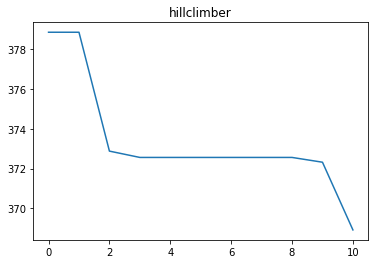

In [6]:
hillclimber_df_N, best_solution_N = random_start_hillclimber(joined_N, all_households_N, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'N']
joined = joined.append(best_solution_N, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of Nieuw-West (F)

In [ ]:
joined_F = joined[joined['stadsdeel'] == 'F']
all_households_F  = create_all_households(rel_poi_df, subsectie='F')
all_households_F = all_households_F.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_F, best_solution_F = random_start_hillclimber(joined_F, all_households_F, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'F']
joined = joined.append(best_solution_F, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of "Centrum"

In [ ]:
joined_C = joined[joined['stadsdeel'].isin(['M', 'A', 'K', 'E'])]
all_households_C = create_all_households(rel_poi_df, subsectie = ['M', 'A', 'K', 'E'])
all_households_C = all_households_C.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_C, best_solution_C = random_start_hillclimber(joined_C, all_households_C, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'].isin(['T', 'N', 'F'])]
joined = joined.append(best_solution_C, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Calculation of lower and upper bounds

In [ ]:
# Lower bound
joined_cluster_distance = joined.set_index('s1_afv_nodes').join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index().rename(columns={'index': 'van_s1_afv_nodes'})
joined_cluster_distance = joined_cluster_distance.sort_values(by='afstand')
pivot = joined_cluster_distance.groupby('naar_s1_afv_nodes').first()
lower_bound = (pivot['afstand'] * pivot['count']).sum() / pivot['count'].sum()
lower_bound

### Conclusion
Preliminary results show that 